--- 
Project for the course in Microeconometrics | Summer 2020, M.Sc. Economics, Bonn University | [Federico Alexander Rizzuto](https://github.com/FedericoAlexanderRizzuto)

# Replication of Joshua D. Angrist, Erich Battistin, and Daniela Vuri  (2017) <a class="tocSkip">   
---

This notebook contains my replication of the results from the following paper:

> Angrist, J. D., Battistin, E., and Vuri, D. (2017). In a small moment: Class size and moral hazard in the Italian Mezzogiorno. _American Economic Journal: Applied Economics, 9(4)_, 216-49.

The original paper, data and code can be accessed [here](https://www.aeaweb.org/articles?id=10.1257/app.20160267).

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction-1">1. Introduction</a></span></li><li><span><a href="#2.-Theoretical-Background" data-toc-modified-id="2.-Theoretical-Background-2">2. Theoretical Background</a></span></li><li><span><a href="#3.-Identification" data-toc-modified-id="3.-Identification-3">3. Identification</a></span></li><li><span><a href="#4.-Empirical-Strategy" data-toc-modified-id="4.-Empirical-Strategy-4">4. Empirical Strategy</a></span></li><li><span><a href="#5.-Replication-of-Lindo-et-al.-(2010)" data-toc-modified-id="5.-Replication-of-Lindo-et-al.-(2010)-5">5. Replication of Lindo et al. (2010)</a></span><ul class="toc-item"><li><span><a href="#5.1.-Data-&amp;-Descriptive-Statistics" data-toc-modified-id="5.1.-Data-&amp;-Descriptive-Statistics-5.1">5.1. Data &amp; Descriptive Statistics</a></span></li><li><span><a href="#5.2.-Results" data-toc-modified-id="5.2.-Results-5.2">5.2. Results</a></span><ul class="toc-item"><li><span><a href="#5.2.1.-Tests-of-the-Validity-of-the-RD-Approach" data-toc-modified-id="5.2.1.-Tests-of-the-Validity-of-the-RD-Approach-5.2.1">5.2.1. Tests of the Validity of the RD Approach</a></span></li><li><span><a href="#i.--Extension:-Visual-Validity-Check" data-toc-modified-id="i.--Extension:-Visual-Validity-Check-5.2.2">i.  Extension: Visual Validity Check</a></span></li><li><span><a href="#ii.-Advanced-Validity-Check" data-toc-modified-id="ii.-Advanced-Validity-Check-5.2.3">ii. Advanced Validity Check</a></span></li><li><span><a href="#5.2.2.-First-Year-GPAs-and-Academic-Probation" data-toc-modified-id="5.2.2.-First-Year-GPAs-and-Academic-Probation-5.2.4">5.2.2. First Year GPAs and Academic Probation</a></span></li><li><span><a href="#5.2.3.-The-Immediate-Response-to-Academic-Probation" data-toc-modified-id="5.2.3.-The-Immediate-Response-to-Academic-Probation-5.2.5">5.2.3. The Immediate Response to Academic Probation</a></span></li><li><span><a href="#5.2.4.-The-Impact-onSubsequent-Performance" data-toc-modified-id="5.2.4.-The-Impact-onSubsequent-Performance-5.2.6">5.2.4. The Impact onSubsequent Performance</a></span></li><li><span><a href="#i.-Main-Results-for-Impact-on-GPA-&amp;-Probability-of-Placing-Above-Cutoff-in-the-Next-Term" data-toc-modified-id="i.-Main-Results-for-Impact-on-GPA-&amp;-Probability-of-Placing-Above-Cutoff-in-the-Next-Term-5.2.7">i. Main Results for Impact on GPA &amp; Probability of Placing Above Cutoff in the Next Term</a></span></li><li><span><a href="#ii.-Formal-Bound-Analysis-on-Subsequent-GPA-(partial-extension)" data-toc-modified-id="ii.-Formal-Bound-Analysis-on-Subsequent-GPA-(partial-extension)-5.2.8">ii. Formal Bound Analysis on Subsequent GPA (partial extension)</a></span></li><li><span><a href="#5.2.5.-The-Impacts-on-Graduation" data-toc-modified-id="5.2.5.-The-Impacts-on-Graduation-5.2.9">5.2.5. The Impacts on Graduation</a></span></li></ul></li></ul></li><li><span><a href="#6.-Extension:-Robustness-Checks" data-toc-modified-id="6.-Extension:-Robustness-Checks-6">6. Extension: Robustness Checks</a></span><ul class="toc-item"><li><span><a href="#6.1.--A-Closer-Look-at-Students'-Subsequent-Performance." data-toc-modified-id="6.1.--A-Closer-Look-at-Students'-Subsequent-Performance.-6.1">6.1.  A Closer Look at Students' Subsequent Performance.</a></span><ul class="toc-item"><li><span><a href="#6.1.1.-Subsequent-Performance-and-Total-Credits-in-Year-2" data-toc-modified-id="6.1.1.-Subsequent-Performance-and-Total-Credits-in-Year-2-6.1.1">6.1.1. Subsequent Performance and Total Credits in Year 2</a></span></li><li><span><a href="#6.1.2.-Subsequent-Cumulative-Grade-Point-Average-(CGPA)" data-toc-modified-id="6.1.2.-Subsequent-Cumulative-Grade-Point-Average-(CGPA)-6.1.2">6.1.2. Subsequent Cumulative Grade Point Average (CGPA)</a></span></li></ul></li><li><span><a href="#6.2.-Bandwidth-Sensitivity" data-toc-modified-id="6.2.-Bandwidth-Sensitivity-6.2">6.2. Bandwidth Sensitivity</a></span></li></ul></li><li><span><a href="#7.-Conclusion" data-toc-modified-id="7.-Conclusion-7">7. Conclusion</a></span></li><li><span><a href="#8.-References" data-toc-modified-id="8.-References-8">8. References</a></span></li></ul></div>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm_api
import matplotlib.pyplot as plt
from linearmodels import IV2SLS

In [2]:
from auxiliary.auxiliary_plots import *
from auxiliary.auxiliary_tables import *
from auxiliary.auxiliary_regressions import *

---
# 1. Introduction 
---

<div style="text-align: justify"> 
The relationship between class size and student achievement has long been at the center of public and academic discussions on educational policy. The notion that reducing class size has sizable positive effects on student achievement is a widely held belief among families, teachers, and educationalists. Numerous mechanisms have been proposed for this supposed causal relationship. Teachers may prepare both the whole class and individual students more effectively as time spent on class management decreases, time devoted to individual pupils increases and it is easier to tailor teaching methods to a particular class; teacher and student performance may benefit from higher morale; pupils, especially those with a weak socio-economic background, may identify more strongly with the educational process (Averett and McLennan, 2004). Policymakers have at times embraced this view and implemented class-size reduction (CSR) programs. In the US, California passed a CSR reform aimed at kindergarteners in 1996, while Florida enshrined new class size caps in the state constitution in 2002. </div> 
<br> <div style="text-align: justify">     
Social scientists have devoted their attention to the topic as well, attempting to quantify potential gains from smaller classes. In fact, given the hefty price tag attached to CSR programs
(<a href="http://www.fldoe.org/finance/budget/class-size/">Florida's program reportedly cost USD 46 billion over a 17-year horizon</a>), the magnitude of their returns is of crucial interest. Krueger's (1999) prominent analysis of the STAR project, a randomized experiment conducted in Tennessee from 1985 to 1989, concluded that K-3 pupils attending one-third smaller classes (7 to 8 fewer students) received a boost in their test scores of 0.19 to 0.28 standard deviations. A study of project STAR's long-term effects suggested that treated individuals were 2 percentage points more likely to enroll in college (Chetty et al., 2011). Angrist and Lavy (1999) found similarly substantial class-size effects for 4th and 5th graders in Israel, where classes are capped at 40 students, but these findings were called into question by Angrist and Lavy (2019), who estimated robust zero class-size effects using more recent data. CSR initiatives in Connecticut, Florida, and California were also shown to exhibit either no (Hoxby, 2000; Chingos, 2012) or small returns (Jepsen and Rivkin, 2009). In sum, the evidence provides some support to the view that smaller classes enhance student performance, although the benefits appear to be small and concentrated at an early stage of education. </div> 
<br> <div style="text-align: justify"> Angrist, Battistin, and Vuri (2017) add to the literature by investigating the implications of systematic manipulation of test scores for the research on CSR using Italian data on INVALSI tests. These are yearly nation-wide standardized tests covering mathematics and Italian language skills and administered by the INVALSI institute to certain grades of all public schools. In elementary school, INVALSI tests were and still are paper-based, meaning that teachers need to correct them and transcribe the results. This led part of the teachers to adopt shirking behavior, also because 
    Their main contribution lies in illustrating how in certain settings class size can influence test score manipulation and thereby drive estimates of class-size effects. </div> <br>
    
**Main variables** 

| **Main Outcomes**   | **Treatment**       | **Instrument**      | **Assignment Variable**             |
|---------------------|---------------------|---------------------|-------------------------------------|
| Math test scores    | Class size          | Maimonides rule     | Grade enrollment at school          |
| Italian test scores |                     |                     |                                     |
               






|                     **Main Covariates**                               ||
|------------------------------------|-----------------------------------|
| Female                             | Nonresponses - Female             |
| Immigrant                          | Nonresponses - Immigrant          |
| Father high school dropout         | Father high school graduate       |
| Father college graduate            | Nonresponses - Fathers' education |
| Mother homemaker                   | Mother unemployed                 |
| Nonresponses - Mothers' education  | Regional dummy                    | 
| Year dummy                         |                                   |

---
# 2. Theoretical Background
---

## 5.1. Data & Descriptive Statistics

In [3]:
# load dataset and create the North-Center dummy
df = pd.read_stata(r'data\smallmo.dta')
df = prepare_data(df)
print('The dataset includes', len(df), 'observations.')

The dataset includes 140010 observations.


<div style="text-align: justify"> Angrist et al. (2017) use repeated cross-sectional data on Italian language and Mathematics test scores of second and fifth-graders for the years 2009-10 to 2011-12. They subsample the data collected by the INVALSI institute to exclude classes below the mandatory minimum number of pupils (10 before 2010 and 15 from 2011), instances mainly concerning mountainous areas and small island, as well as schools with grade enrollment above 160, i.e. where the Maimonides' Rule ceases to meaningfully predict actual class size. The final dataset, which corresponds to that provided by the authors, includes 140010 observations, about 70000 for each grade. The unit of observation is the class. <div style="text-align: justify"> 

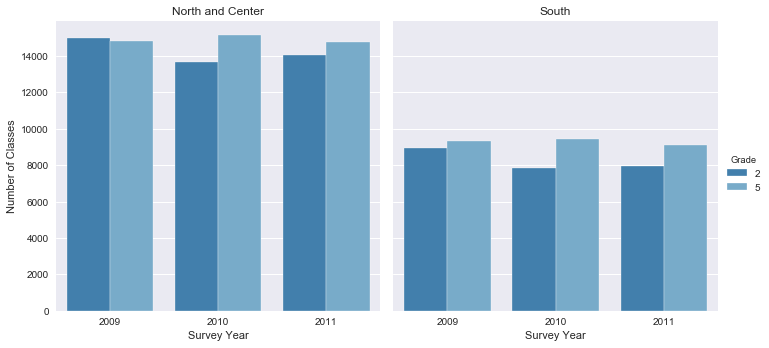

In [4]:
plot_count_classes(df)

<div style="text-align: justify"> Panels A, B, and C of Table 1 report descriptive statistics respectively for the class, school, and institution level (oftentimes schools are grouped together and managed as one unit). Panel A hints at differing socio-economic backgrounds of pupils in the South and in the North/Center: The share of immigrant students is 9 p.p. lower in the South and there is a wide regional gap of about 30 p.p. in employment rates of pupils' mothers. In contrast, the percentages of fathers who graduated from high school do not show such stark discrepancies. As to educational variables, in the South classes are somewhat smaller, test scores in Math are higher and student performance in general displays a higher variability. Finally, the share of classes with compromised scores, as estimated by the authors, is markedly higher (9 to 12 p.p.) in the South.  <div style="text-align: justify">

#### Table 1 - Descriptive Statistics

---
<div style="text-align: justify"><span style="color:orange"><b>NOTE</b>:</span> 
Some statistics displayed in Table 1 diverge from those reported in the original paper but align with the output of the original Stata code. I have contacted the authors, who have looked into it and confirmed that some numbers had been swapped.
In particular, the standard deviations and/or the means of the following variables appear to be incorrect: <i> Female, Immigrant, Father HS, Mother employed, Pct correct: Math, External monitor</i>. The rest of the analysis is unaffected by this problem. <div style="text-align: justify">

---

_Panel A. Class characteristics: Means and standard deviations (in parentheses) are computed using one observation per class._

_*Conditional on non-missing survey responses_

In [5]:
create_table1a(df)

grade                                Grade 2                          Grade 5  \
north_center                           Italy North/Center     South     Italy   
Female*                      mean       0.49         0.49      0.49      0.49   
                             std        0.11         0.11      0.11      0.11   
Immigrant*                   mean       0.10         0.14      0.03      0.10   
                             std        0.12         0.13      0.06      0.12   
Father HS*                   mean       0.34         0.34      0.33      0.31   
                             std        0.14         0.13      0.16      0.15   
Mother employed*             mean       0.54         0.67      0.37      0.53   
                             std        0.23         0.16      0.20      0.23   
Pct correct: Math            mean      63.91        61.54     68.02     64.16   
                             std       13.15        10.29     16.20     12.91   
Pct correct: Language        mean      69.78        69.18     70.81     74.22   
                             std       10.92         9.18     13.34      8.90   
Class size                   mean      20.12        20.25     19.90     19.66   
                             std        3.40         3.35      3.48      3.72   
Score manipulation: Math     mean       0.06         0.02      0.14      0.07   
                             std        0.24         0.13      0.35      0.25   
Score manipulation: Language mean       0.05         0.02      0.11      0.06   
                             std        0.23         0.15      0.31      0.23   
Number of classes            count  67453.00     42747.00  24706.00  72536.00   

grade                                                      
north_center                       North/Center     South  
Female*                      mean          0.49      0.49  
                             std           0.11      0.11  
Immigrant*                   mean          0.14      0.03  
                             std           0.13      0.06  
Father HS*                   mean          0.32      0.30  
                             std           0.14      0.16  
Mother employed*             mean          0.65      0.36  
                             std           0.16      0.19  
Pct correct: Math            mean         63.26     65.61  
                             std          10.87     15.53  
Pct correct: Language        mean         74.27     74.12  
                             std           7.47     10.82  
Class size                   mean         19.90     19.28  
                             std           3.67      3.76  
Score manipulation: Math     mean          0.02      0.14  
                             std           0.15      0.34  
Score manipulation: Language mean          0.02      0.11  
                             std           0.15      0.31  
Number of classes            count     44739.00  27797.00

_Panel B. School characteristics: Means and standard deviations (in parentheses) are computed using one observation per school._

In [6]:
create_table1b(df)

grade                     Grade 2                          Grade 5  \
north_center                Italy North/Center     South     Italy   
Number of classes mean       1.95         1.87      2.11      1.94   
                  std        1.11         1.01      1.27      1.10   
Enrollment        mean      40.52        38.83     43.83     38.87   
                  std       25.16        22.99     28.64     25.19   
Number of schools count  34591.00     22863.00  11728.00  37476.00   

grade                                           
north_center            North/Center     South  
Number of classes mean          1.85      2.10  
                  std           0.98      1.28  
Enrollment        mean         37.32     41.69  
                  std          22.76     28.91  
Number of schools count     24225.00  13251.00

_Panel C. Institution characteristics: Means and standard deviations (in parentheses) are computed using one observation per institution._

In [7]:
create_table1c(df)

grade                     Grade 2                         Grade 5  \
north_center                Italy North/Center    South     Italy   
Number of classes mean       3.89         4.33     3.31      4.07   
                  std        1.97         1.95     1.85      1.95   
Enrollment        mean      86.00        95.33    73.68     85.17   
                  std       40.61        39.52    38.71     40.45   
External monitor  mean       0.22         0.23     0.20      0.21   
                  std        0.41         0.42     0.40      0.41   
Number of schools count  17333.00      9866.00  7467.00  17830.00   

grade                                          
north_center            North/Center    South  
Number of classes mean          4.48     3.55  
                  std           1.91     1.88  
Enrollment        mean         94.02    73.88  
                  std          39.11    39.31  
External monitor  mean          0.23     0.20  
                  std           0.42     0.40  
Number of schools count      9997.00  7833.00

<div style="text-align: justify"> Class sizes in Italy were mandated to range from 10 to 25 students until a 2009 reform (<i>Decreto del President della Repubblica 81/2009</i>), and from 15 to 27 thereafter. Given their stagged rollout, these changes interested only second-graders in the years 2010-11 and 2011-12, i.e. 43545 classes in the sample. Schools were allowed to diverge from these rules by 10 percent at the class-size cap and under special circumstances, e.g. remote location of the school or the presence of a student with disabilities. Figures 2 and 3 plot school enrollment against actual and predicted class size averages, respectively for classes unaffected and affected by the reform. It appears that Maimonides' Rule manages to follow actual class size relatively well up to an enrollment of 75 students, with deviations at the class-size cap typically consisting in adding a class earlier than mandated. The fit is worse for classes affected by the 2009 reform. <div style="text-align: justify">

#### Figure 2 - Maimonides in Italy (Pre-Reform)

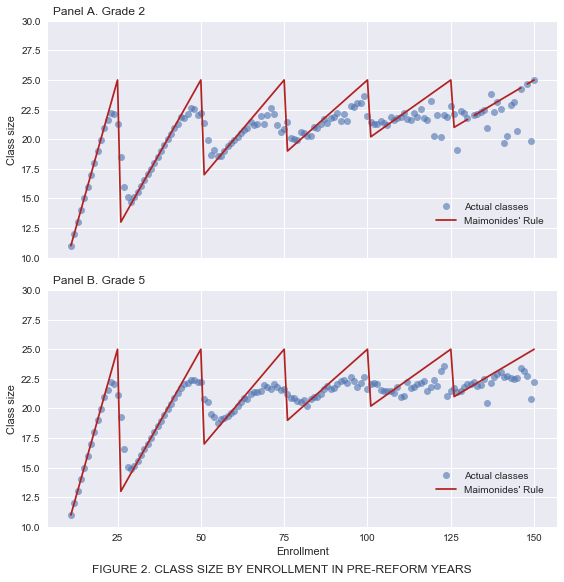

In [8]:
create_fig2(df)

#### Figure 3 - Maimonides in Italy (Post-Reform)

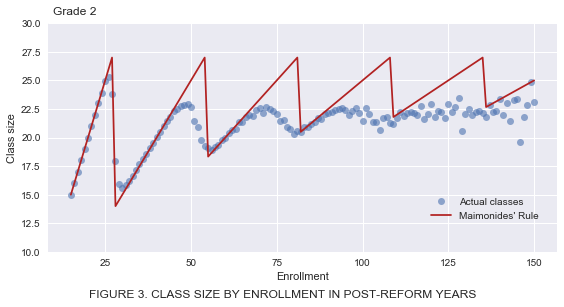

In [9]:
create_fig3(df)

In [10]:
print('There are', len(df[df['d']=='Grade 2 from 2010']), 'affected by the 2009 reform.')

There are 43545 affected by the 2009 reform.


#### Figure 4

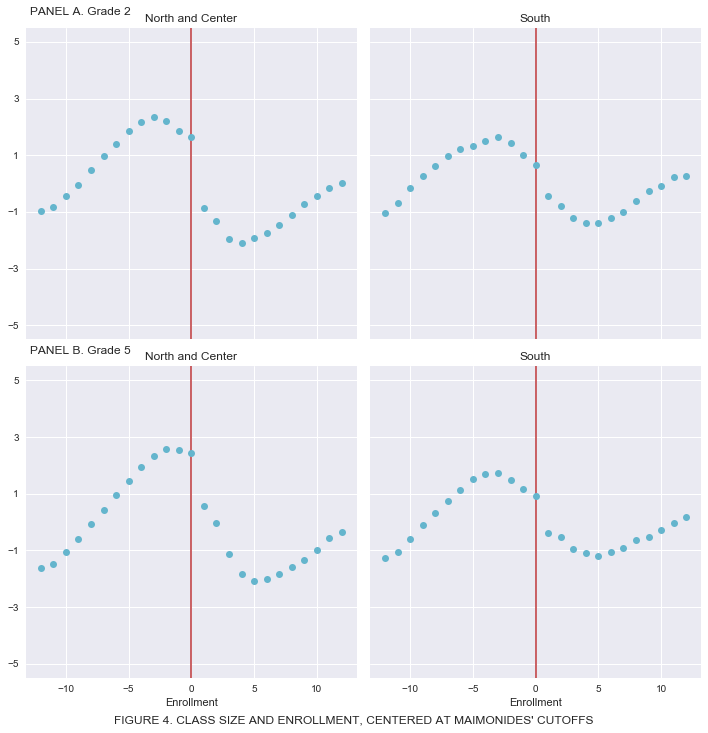

In [11]:
create_fig4(df)

#### Figure 5

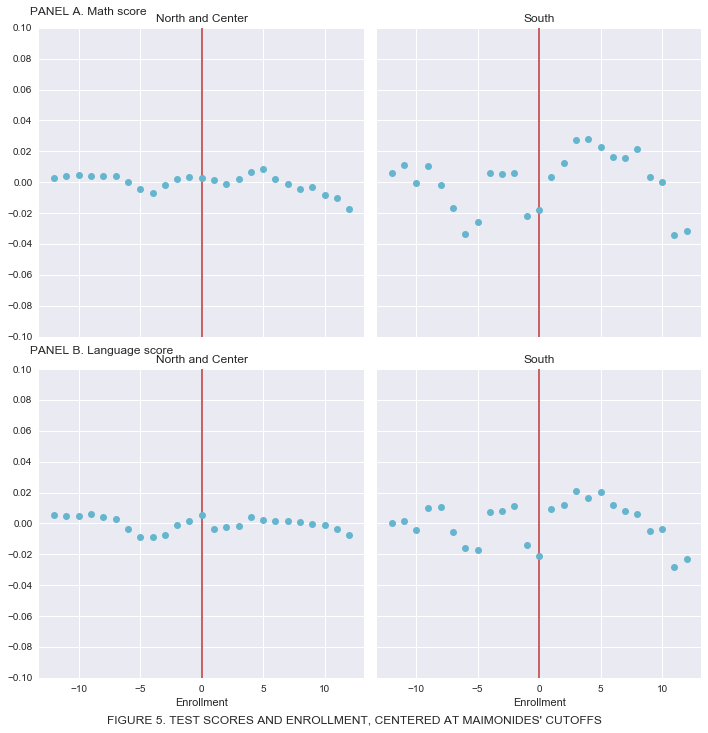

In [12]:
create_fig5(df)

#### Figure 6

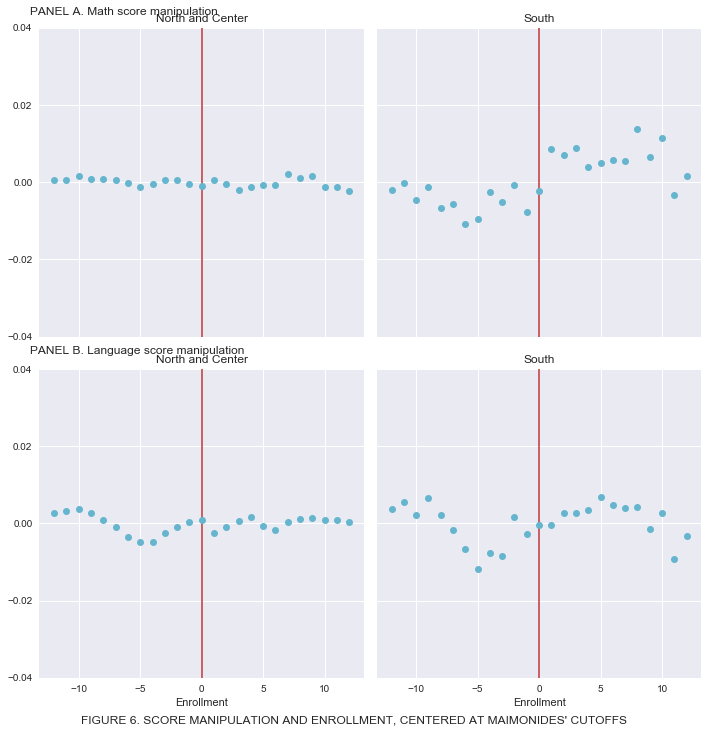

In [13]:
create_fig6(df)

#### Table 2

In [14]:
create_table2and3(df,['answers_math_std','answers_ital_std'],['Panel A. Math', 'Panel B. Language'])

OLS                      \
                                                Italy North/Center  South   
Panel A. Math     Class size - coefficient     -0.008       -0.022  0.009   
                  Class size - standard error   0.007        0.007  0.015   
                  Enrollment                        X            X      X   
                  Enrollment squared                X            X      X   
                  Interactions                                              
                  Observations                 140010        87498  52512   
Panel B. Language Class size - coefficient      0.003       -0.019  0.033   
                  Class size - standard error   0.006        0.005  0.011   
                  Enrollment                        X            X      X   
                  Enrollment squared                X            X      X   
                  Interactions                                              
                  Observations                 140010        87498  52512   

                                              IV/2SLS                       \
                                                Italy North/Center   South   
Panel A. Math     Class size - coefficient     -0.052       -0.044  -0.096   
                  Class size - standard error   0.013        0.012   0.036   
                  Enrollment                        X            X       X   
                  Enrollment squared                X            X       X   
                  Interactions                                               
                  Observations                 140010        87498   52512   
Panel B. Language Class size - coefficient     -0.040       -0.031  -0.064   
                  Class size - standard error   0.011        0.009   0.029   
                  Enrollment                        X            X       X   
                  Enrollment squared                X            X       X   
                  Interactions                                               
                  Observations                 140010        87498   52512   

                                               IV/2SLS                       
                                                 Italy North/Center   South  
Panel A. Math     Class size - coefficient      -0.061       -0.042  -0.129  
                  Class size - standard error    0.020        0.017   0.051  
                  Enrollment                         X            X       X  
                  Enrollment squared                 X            X       X  
                  Interactions                       X            X       X  
                  Observations                  140010        87498   52512  
Panel B. Language Class size - coefficient      -0.041       -0.021  -0.094  
                  Class size - standard error    0.016        0.014   0.040  
                  Enrollment                         X            X       X  
                  Enrollment squared                 X            X       X  
                  Interactions                       X            X       X  
                  Observations                  140010        87498   52512

#### Table 3

In [15]:
create_table2and3(df,['our_CHEAT_math','our_CHEAT_ital'],['Panel A. Math', 'Panel B. Language'])

OLS                       \
                                                Italy North/Center   South   
Panel A. Math     Class size - coefficient     -0.016       -0.007  -0.031   
                  Class size - standard error   0.002        0.002   0.006   
                  Enrollment                        X            X       X   
                  Enrollment squared                X            X       X   
                  Interactions                                               
                  Observations                 139996        87491   52505   
Panel B. Language Class size - coefficient     -0.017       -0.012  -0.024   
                  Class size - standard error   0.002        0.002   0.005   
                  Enrollment                        X            X       X   
                  Enrollment squared                X            X       X   
                  Interactions                                               
                  Observations                 140003        87493   52510   

                                              IV/2SLS                       \
                                                Italy North/Center   South   
Panel A. Math     Class size - coefficient     -0.019       -0.004  -0.054   
                  Class size - standard error   0.005        0.003   0.014   
                  Enrollment                        X            X       X   
                  Enrollment squared                X            X       X   
                  Interactions                                               
                  Observations                 139996        87491   52505   
Panel B. Language Class size - coefficient     -0.020       -0.012  -0.040   
                  Class size - standard error   0.004        0.003   0.013   
                  Enrollment                        X            X       X   
                  Enrollment squared                X            X       X   
                  Interactions                                               
                  Observations                 140003        87493   52510   

                                               IV/2SLS                       
                                                 Italy North/Center   South  
Panel A. Math     Class size - coefficient      -0.018       -0.005  -0.047  
                  Class size - standard error    0.007        0.004   0.020  
                  Enrollment                         X            X       X  
                  Enrollment squared                 X            X       X  
                  Interactions                       X            X       X  
                  Observations                  139996        87491   52505  
Panel B. Language Class size - coefficient      -0.016       -0.006  -0.038  
                  Class size - standard error    0.006        0.005   0.018  
                  Enrollment                         X            X       X  
                  Enrollment squared                 X            X       X  
                  Interactions                       X            X       X  
                  Observations                  140003        87493   52510

#### Table 5

In [16]:
create_table5(df)

Score manipulation  \
                                                                            Italy   
Panel A. Math     Monitor at institution - coefficient                     -0.029   
                  Monitor at institution - standard error                   0.002   
                  Dependent mean variable - coefficient                     0.064   
                  Dependent mean variable - standard deviation              0.246   
                  Observations                                             139996   
Panel B. Language Monitor at institution - coefficient                     -0.025   
                  Monitor at institution - standard error                   0.002   
                  Dependent mean variable - coefficient                     0.055   
                  Dependent mean variable - standard deviation              0.229   
                  Observations                                             140003   

                                                                             \
                                                               North/Center   
Panel A. Math     Monitor at institution - coefficient               -0.010   
                  Monitor at institution - standard error             0.001   
                  Dependent mean variable - coefficient               0.020   
                  Dependent mean variable - standard deviation        0.139   
                  Observations                                        87491   
Panel B. Language Monitor at institution - coefficient               -0.012   
                  Monitor at institution - standard error             0.001   
                  Dependent mean variable - coefficient               0.023   
                  Dependent mean variable - standard deviation        0.149   
                  Observations                                        87493   

                                                                        \
                                                                 South   
Panel A. Math     Monitor at institution - coefficient          -0.062   
                  Monitor at institution - standard error        0.004   
                  Dependent mean variable - coefficient          0.139   
                  Dependent mean variable - standard deviation   0.346   
                  Observations                                   52505   
Panel B. Language Monitor at institution - coefficient          -0.047   
                  Monitor at institution - standard error        0.004   
                  Dependent mean variable - coefficient          0.110   
                  Dependent mean variable - standard deviation   0.313   
                  Observations                                   52510   

                                                               Test scores  \
                                                                     Italy   
Panel A. Math     Monitor at institution - coefficient              -0.112   
                  Monitor at institution - standard error            0.006   
                  Dependent mean variable - coefficient              0.007   
                  Dependent mean variable - standard deviation       0.637   
                  Observations                                      140010   
Panel B. Language Monitor at institution - coefficient              -0.081   
                  Monitor at institution - standard error            0.004   
                  Dependent mean variable - coefficient              0.010   
                  Dependent mean variable - standard deviation       0.523   
                  Observations                                      140010   

                                                                             \
                                                               North/Center   
Panel A. Math     Monitor at institution - coefficient               -0.075   
                  Monitor at i

#### Table 6

In [17]:
create_table6(df)

Math                       \
                                           Italy North/Center   South   
Class size x Monitor - coefficient        -0.035       -0.039  -0.035   
Class size x Monitor - standard error      0.024        0.021   0.060   
Class size x No monitor - coefficient     -0.066       -0.042  -0.143   
Class size x No monitor - standard error   0.021        0.018   0.053   
Monitor - coefficient                     -0.174       -0.082  -0.395   
Monitor - standard error                   0.041        0.038   0.096   
Observations                              140010        87498   52512   

                                         Language                       
                                            Italy North/Center   South  
Class size x Monitor - coefficient         -0.031       -0.021  -0.048  
Class size x Monitor - standard error       0.019        0.017   0.048  
Class size x No monitor - coefficient      -0.042       -0.021  -0.098  
Class size x No monitor - standard error    0.016        0.014   0.042  
Monitor - coefficient                      -0.103       -0.055  -0.228  
Monitor - standard error                    0.033        0.030   0.076  
Observations                               140010        87498   52512

#### Table 8

In [18]:
create_table8(df)

IV/2SLS  \
                                                                     Italy   
Panel A. Math     Class size - coefficient                           0.008   
                  Class size - standard error                        0.021   
                  Score manipulation - coefficient                   3.827   
                  Score manipulation - standard error                0.189   
                  Class size x Score manipulation - coefficient              
                  Class size x Score manipulation - standard error           
                  Overid test p-value                                        
                  Observations                                      139996   
Panel B. Language Class size - coefficient                           0.012   
                  Class size - standard error                        0.017   
                  Score manipulation - coefficient                   3.289   
                  Score manipulation - standard error                0.182   
                  Class size x Score manipulation - coefficient              
                  Class size x Score manipulation - standard error           
                  Overid test p-value                                        
                  Observations                                      140003   

                                                                                 \
                                                                   North/Center   
Panel A. Math     Class size - coefficient                               -0.003   
                  Class size - standard error                             0.030   
                  Score manipulation - coefficient                        7.330   
                  Score manipulation - standard error                     0.784   
                  Class size x Score manipulation - coefficient                   
                  Class size x Score manipulation - standard error                
                  Overid test p-value                                             
                  Observations                                            87491   
Panel B. Language Class size - coefficient                                0.005   
                  Class size - standard error                             0.020   
                  Score manipulation - coefficient                        4.496   
                  Score manipulation - standard error                     0.452   
                  Class size x Score manipulation - coefficient                   
                  Class size x Score manipulation - standard error                
                  Overid test p-value                                             
                  Observations                                            87493   

                                                                           \
                                                                    South   
Panel A. Math     Class size - coefficient                          0.006   
                  Class size - standard error                       0.044   
                  Score manipulation - coefficient                  2.880   
                  Score manipulation - standard error               0.158   
                  Class size x Score manipulation - coefficient             
                  Class size x Score manipulation - standard error          
                  Overid test p-value                                       
                  Observations                                      52505   
Panel B. Language Class size - coefficient                          0.013   
                  Class size - standard error                       0.039   
                  Score manipulation - coefficient                  2.795   
                  Score manipulation - standard error               0.179   
                  Class size x Score manipulation - coefficient             
            

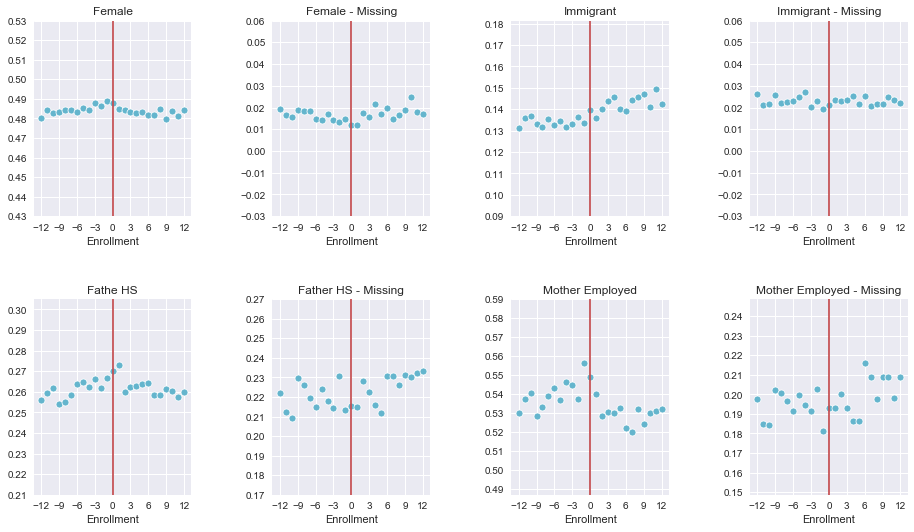

In [21]:
df['dev'] = cutoffs_center(df)
df_south = df[df.north_center ==1]
cols = df_south[['female','m_female','immigrants_broad','m_origin','dad_midedu','m_dad_edu','mom_employed','m_mom_occ']]
titles = ['Female','Female - Missing','Immigrant','Immigrant - Missing','Fathe HS','Father HS - Missing','Mother Employed','Mother Employed - Missing']
Tot = int(len(cols.columns))
Rows = 2
Cols = int(Tot/Rows)
Position = range(1,Tot + 1)
# df.loc[df.sampled_math ==1] 

fig = plt.figure(1)
for k in range(Tot):
    df_south['mycolumn'] = cols.iloc[:,k]
    groupp = df_south.groupby(['dev'],as_index=False)['mycolumn'].mean()
    ax = fig.add_subplot(Rows,Cols,Position[k])
    sns.scatterplot(x='dev', y='mycolumn', data=groupp, palette='pastel',color='c')
    ax.set_ylabel('')
    ax.set_xlabel('Enrollment')
    ax.set_title(titles[k])
    ax.axvline(color='r')
    ax.xaxis.set_ticks(np.arange(-12,15,3))
    ax.yaxis.set_ticks(np.arange(round(groupp['mycolumn'].mean(),2)-0.05, round(groupp['mycolumn'].mean(),2)+0.05, 0.01))
    #plt.yticks(np.arange(min(groupp['mycolumn']), max(groupp['mycolumn']), .1))
    #sns.set(style="ticks")

plt.tight_layout()
fig.set_size_inches(14,8)
plt.show()

---
# 8. References
---

* **Angrist, J. D., and Lavy, V. (1999)**. Using Maimonides' rule to estimate the effect of class size on scholastic achievement. *The Quarterly Journal of Economics, 114(2)*, 533-575.
* **Angrist, J. D.,  Lavy, V., Leder-Luis, J., and Shany, A. (2019)**. Maimonides' Rule Redux. *American Economic Review: Insights, 1(3)*, 309-24.
* **Averett, S. L., and McLennan, M. C. (2004)**. Exploring the effect of class size on student achievement: What have we learned over the past two decades. *International handbook on the Economics of Education, 329*, 329.
* **Chetty, R., Friedman, J. N., Hilger, N., Saez, E., Schanzenbach, D. W., and Yagan, D. (2011)**. How does your kindergarten classroom affect your earnings? Evidence from Project STAR. *The Quarterly Journal of Economics, 126(4)*, 1593-1660.
* **Chingos, M. M. (2012)**. The impact of a universal class-size reduction policy: Evidence from Florida's statewide mandate. *Economics of Education Review, 31(5)*, 543-562.
* **Hoxby, C. M. (2000)**. The effects of class size on student achievement: New evidence from population variation. *The Quarterly Journal of Economics, 115(4)*, 1239-1285.
* **Jepsen, C., and Rivkin, S. (2009)**. Class size reduction and student achievement the potential tradeoff between teacher quality and class size. *Journal of human resources, 44(1)*, 223-250.
* **Krueger, A. B. (1999)**. Experimental estimates of education production functions. *The Quarterly Journal of Economics, 114(2)*, 497-532.